<a href="https://colab.research.google.com/github/Lagoon-Jelly/Intro-to-AI/blob/main/deep_learning_openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

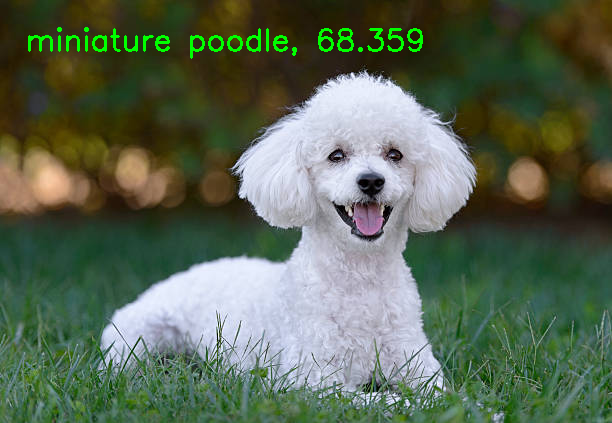

False

In [13]:
#https://learnopencv.com/deep-learning-with-opencvs-dnn-module-a-definitive-guide/
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# read the ImageNet class names
with open('input/classification_classes_ILSVRC2012.txt', 'r') as f:
    image_net_names = f.read().split('\n')
# final class names (just the first word of the many ImageNet names for one image)
class_names = [name.split(',')[0] for name in image_net_names]

# load the neural network model
model = cv2.dnn.readNet(model='input/DenseNet_121.caffemodel',
                      config='input/DenseNet_121.prototxt',
                      framework='Caffe')

# load the image from disk
image = cv2.imread('input/image_3.jpg')
# create blob from image
blob = cv2.dnn.blobFromImage(image=image, scalefactor=0.01, size=(224, 224),
                             mean=(104, 117, 123))
# set the input blob for the neural network
model.setInput(blob)
# forward pass image blog through the model
outputs = model.forward()

final_outputs = outputs[0]
# make all the outputs 1D
final_outputs = final_outputs.reshape(1000, 1)
# get the class label
label_id = np.argmax(final_outputs)
# convert the output scores to softmax probabilities
probs = np.exp(final_outputs) / np.sum(np.exp(final_outputs))
# get the final highest probability
final_prob = np.max(probs) * 100.
# map the max confidence to the class label names
out_name = class_names[label_id]
out_text = f"{out_name}, {final_prob:.3f}"

# put the class name text on top of the image
cv2.putText(image, out_text, (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0),
            2)
cv2_imshow(image)
cv2.waitKey(0)
cv2.imwrite('outputs/result_image.jpg', image)
